<a href="https://colab.research.google.com/github/jespimentel/state_of_data_brazil_2023/blob/main/state_of_data_brazil_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#State of Dat Brazil 2023
##Análise do dataset resultante da pesquisa "State of Data Brazil 2023"

Fonte: https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-2023

Confira nosso notebook com Plotly Express em: https://www.kaggle.com/code/josepimentel/state-of-data-brazil-2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('State_of_data_BR_2023_Kaggle - df_survey_2023.csv')
df.head(5)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Colunas de interesse

In [2]:
df_1 = df.rename(columns={"('P1_a ', 'Idade')":"Idade",
                   "('P1_b ', 'Genero')":"Gênero",
                   "('P1_g ', 'vive_no_brasil')":"No Brasil?",
                   "('P1_i_1 ', 'uf onde mora')":"UF resid.",
                   "('P1_l ', 'Nivel de Ensino')":"Ensino",
                   "('P1_m ', 'Área de Formação')":"Formação",
                   "('P2_a ', 'Qual sua situação atual de trabalho?')":"Sit. atual",
                   "('P2_b ', 'Setor')": "Setor",
                   "('P2_e ', 'Cargo como Gestor')":"Gestor",
                   "('P2_f ', 'Cargo Atual')":"Cargo atual",
                   "('P2_g ', 'Nivel')":"Nível",
                   "('P2_h ', 'Faixa salarial')":"Salário",
                   "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')":"Exp. dados",
                   "('P2_k ', 'Você está satisfeito na sua empresa atual?')":"Satisfeito?",
                   "('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')":"Quer mudar?",
                   "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')" :"Linguagem",
                  })

df_1 = df_1 [['Idade', 'Gênero', 'No Brasil?','UF resid.', 'Ensino','Formação', 'Sit. atual','Setor', 'Gestor', 'Cargo atual','Nível',
            'Salário', 'Exp. dados', 'Satisfeito?', 'Quer mudar?', 'Linguagem']]

df_1.head(5)

,Idade,Gênero,No Brasil?,UF resid.,Ensino,Formação,Sit. atual,Setor,Gestor,Cargo atual,Nível,Salário,Exp. dados,Satisfeito?,Quer mudar?,Linguagem
0,31,Masculino,1,MG,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Finanças ou Bancos,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,0.0,Estou em busca de oportunidades dentro ou fora...,Python
1,30,Masculino,1,ES,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Finanças ou Bancos,NaN,Analista de BI/BI Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos,1.0,"Não estou buscando, mas me considero aberto a ...",SQL
2,37,Feminino,1,SP,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Finanças ou Bancos,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,1.0,"Não estou buscando, mas me considero aberto a ...",SQL
3,22,Masculino,1,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,"Desempregado, buscando recolocação",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,Masculino,1,MG,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Outra Opção,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,1.0,Não estou buscando e não pretendo mudar de emp...,Python


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Idade        5293 non-null   int64  
 1   Gênero       5293 non-null   object 
 2   No Brasil?   5293 non-null   int64  
 3   UF resid.    5169 non-null   object 
 4   Ensino       5293 non-null   object 
 5   Formação     5180 non-null   object 
 6   Sit. atual   5293 non-null   object 
 7   Setor        4753 non-null   object 
 8   Gestor       896 non-null    object 
 9   Cargo atual  3857 non-null   object 
 10  Nível        3857 non-null   object 
 11  Salário      4753 non-null   object 
 12  Exp. dados   4753 non-null   object 
 13  Satisfeito?  4753 non-null   float64
 14  Quer mudar?  4753 non-null   object 
 15  Linguagem    3772 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 661.8+ KB


# Estatísticas

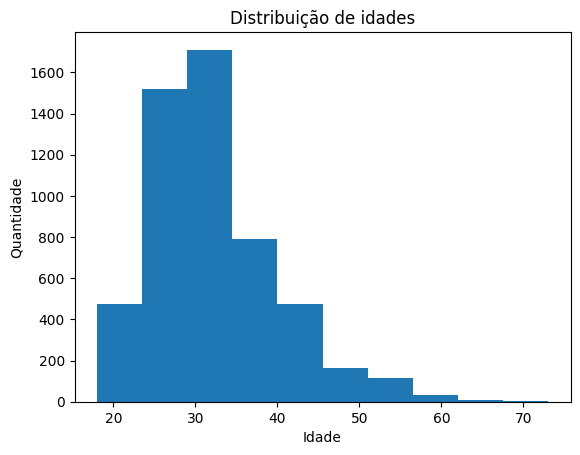

In [4]:
plt.hist(df_1['Idade'])
plt.title('Distribuição de idades')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

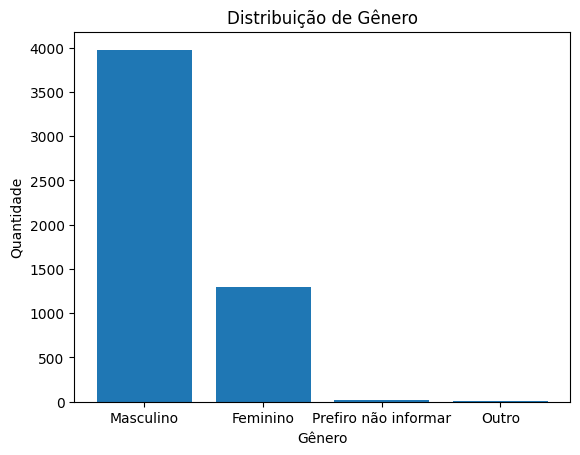

In [5]:
plt.bar(df_1['Gênero'].value_counts().index, df_1['Gênero'].value_counts())
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

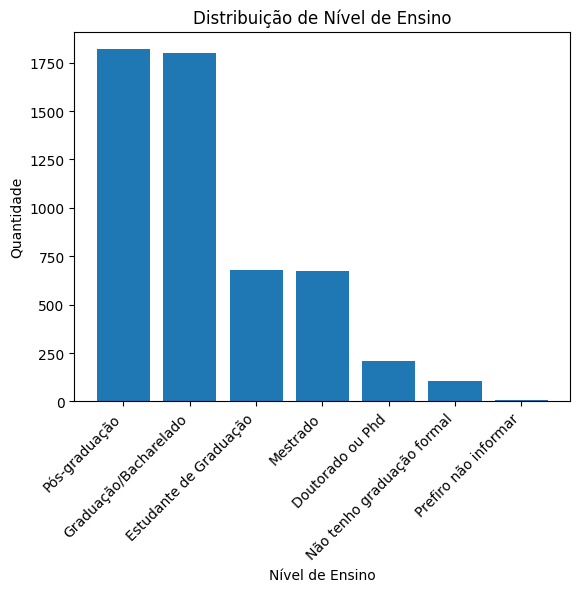

In [6]:
plt.bar(df_1['Ensino'].value_counts().index, df_1['Ensino'].value_counts())
plt.title('Distribuição de Nível de Ensino')
plt.xlabel('Nível de Ensino')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

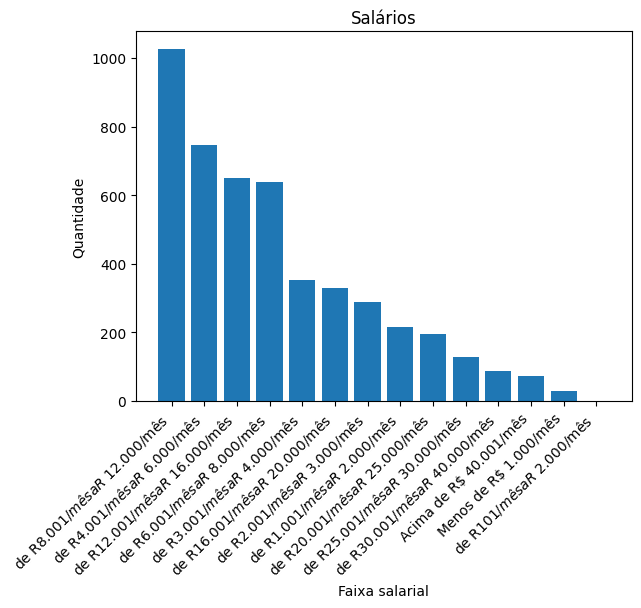

In [7]:
plt.bar(df_1['Salário'].value_counts().index, df_1['Salário'].value_counts())
plt.title('Salários')
plt.xlabel('Faixa salarial')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

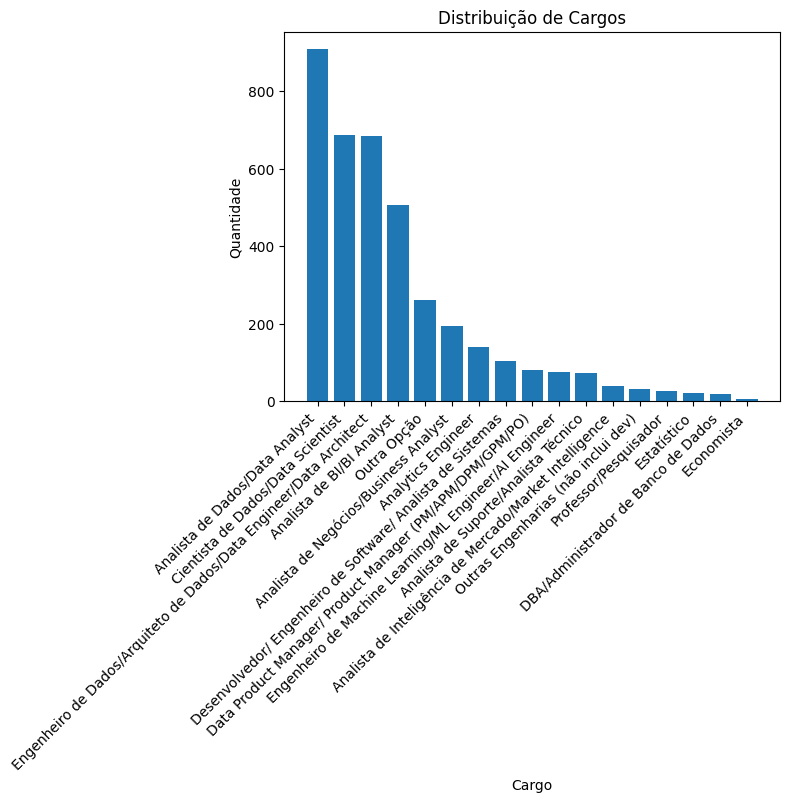

In [8]:
plt.bar(df_1['Cargo atual'].value_counts().index, df_1['Cargo atual'].value_counts())
plt.title('Distribuição de Cargos')
plt.xlabel('Cargo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

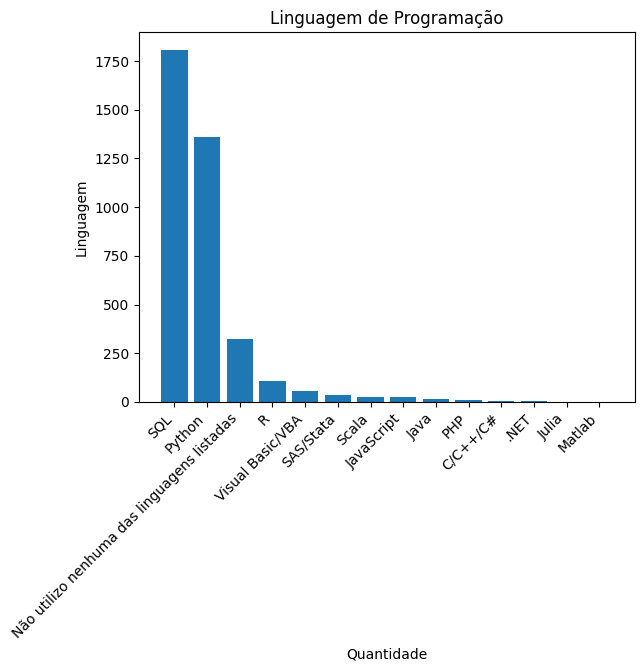

In [9]:
plt.bar(df_1['Linguagem'].value_counts().index, df_1['Linguagem'].value_counts())
plt.title('Linguagem de Programação')
plt.xlabel('Quantidade')
plt.ylabel('Linguagem')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

#Melhores salários

In [10]:
criterio = (df_1['Salário'] == 'Acima de R$ 40.001/mês')|(df_1['Salário'] == 'de R$ 30.001/mês a R$ 40.000/mês')
df_melhores_salarios = df_1[criterio]
df_melhores_salarios.head(5)

,Idade,Gênero,No Brasil?,UF resid.,Ensino,Formação,Sit. atual,Setor,Gestor,Cargo atual,Nível,Salário,Exp. dados,Satisfeito?,Quer mudar?,Linguagem
22,29,Masculino,1,PR,Graduação/Bacharelado,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Área da Saúde,NaN,Cientista de Dados/Data Scientist,Sênior,Acima de R$ 40.001/mês,de 5 a 6 anos,1.0,"Não estou buscando, mas me considero aberto a ...",Python
121,50,Masculino,1,MG,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Área de Consultoria,Diretor/VP,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,1.0,Não estou buscando e não pretendo mudar de emp...,NaN
141,41,Masculino,1,SP,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Finanças ou Bancos,Gerente/Head,NaN,NaN,de R$ 30.001/mês a R$ 40.000/mês,Mais de 10 anos,1.0,"Não estou buscando, mas me considero aberto a ...",NaN
149,45,Masculino,0,NaN,Mestrado,Computação / Engenharia de Software / Sistemas...,Vivo fora do Brasil e trabalho para empresa de...,Outra Opção,Team Leader/Tech Leader,NaN,NaN,de R$ 30.001/mês a R$ 40.000/mês,de 7 a 10 anos,1.0,"Não estou buscando, mas me considero aberto a ...",NaN
192,40,Masculino,1,SP,Mestrado,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Tecnologia/Fábrica de Software,Gerente/Head,NaN,NaN,de R$ 30.001/mês a R$ 40.000/mês,Mais de 10 anos,1.0,Estou em busca de oportunidades dentro ou fora...,NaN


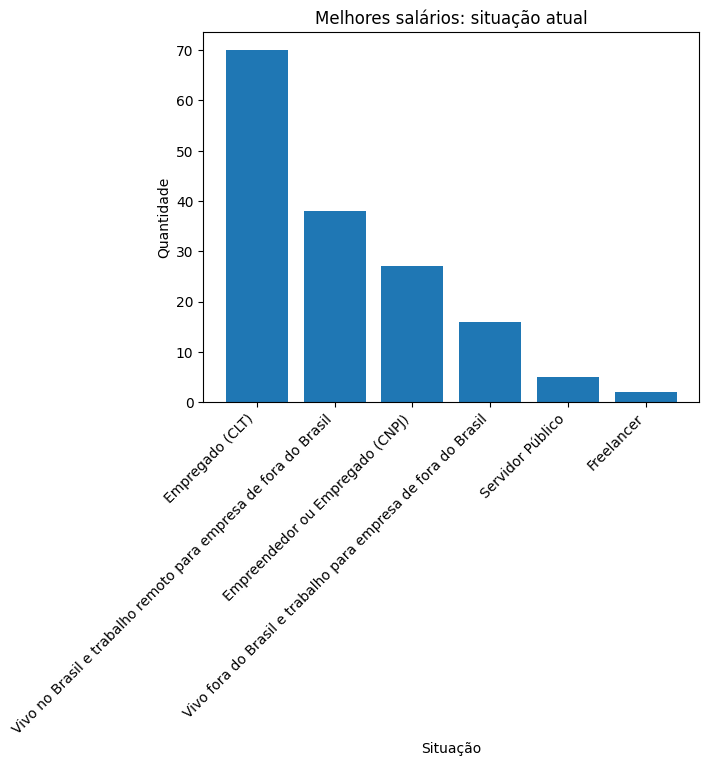

In [11]:
plt.bar(df_melhores_salarios['Sit. atual'].value_counts().index, df_melhores_salarios['Sit. atual'].value_counts())
plt.title('Melhores salários: situação atual')
plt.xlabel('Situação')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

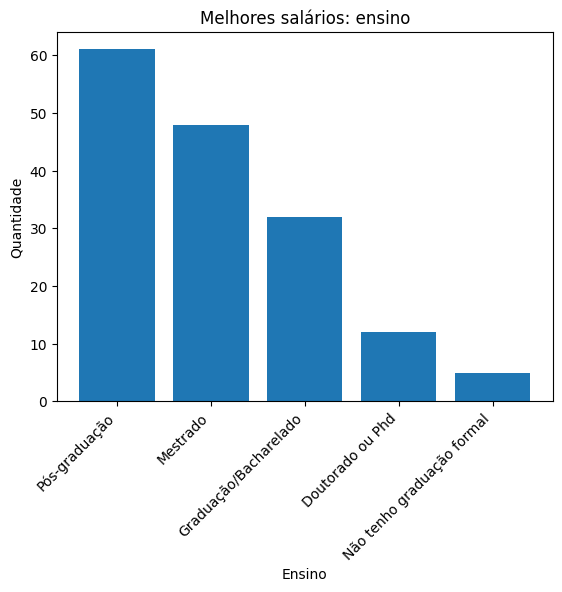

In [12]:
plt.bar(df_melhores_salarios['Ensino'].value_counts().index, df_melhores_salarios['Ensino'].value_counts())
plt.title('Melhores salários: ensino')
plt.xlabel('Ensino')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

In [13]:
# Média de idade
df_melhores_salarios['Idade'].mean()

37.721518987341774

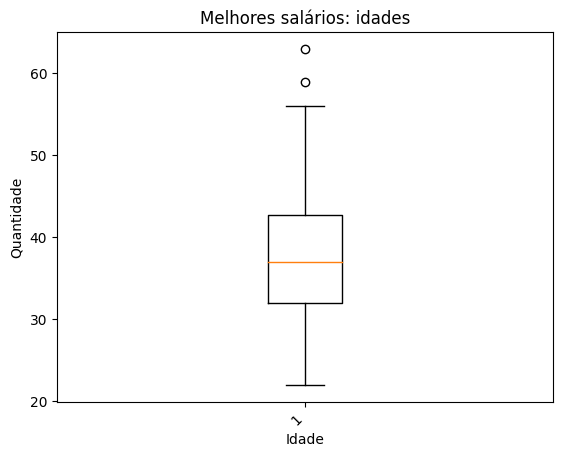

In [14]:
plt.boxplot(df_melhores_salarios['Idade'])
plt.title('Melhores salários: idades')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()